In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.options.display.float_format = "{:,.5f}".format
import warnings
warnings.filterwarnings('ignore')

In [2]:
M = pd.read_csv("C:\\Users\\ricardo\\Desktop\\PropedeuticoCienciaDeDatos\\Bases\\TipoDeCambio.csv",dtype='str',encoding = "ISO-8859-1")
M["Fecha"] = pd.to_datetime(M["Fecha"],format="%d/%m/%Y")
M["Tipo de Cambio"] = M["Tipo de Cambio"].astype(float)
M.head()

,Fecha,Tipo de Cambio
0,2022-01-03,20.58900
1,2022-01-04,20.47420
2,2022-01-05,20.39770
3,2022-01-06,20.45880
4,2022-01-07,20.42370


In [3]:
vaux = M["Tipo de Cambio"].values.tolist()
#Cálculo de la media
E, n = 0, len(vaux)
for i in range(n):
    E = E + vaux[i]
media = E/n
print("El valor esperado es igual a",E/n)

El valor esperado es igual a 20.254278894472357


In [4]:
#Valor esperado calculado con función de Python
media = M["Tipo de Cambio"].mean()
print("El valor esperado es igual a",media)

El valor esperado es igual a 20.25427889447236


In [5]:
#Cálculo de la desviación estándar
S = 0
for i in range(n):
    S = S + (vaux[i] - media)**2
varianza = S/n
print("La varianza es igual a",varianza)
print("La desviación estándar es igual a",varianza**(0.5))

La varianza es igual a 0.1127597222681246
La desviación estándar es igual a 0.3357971445205045


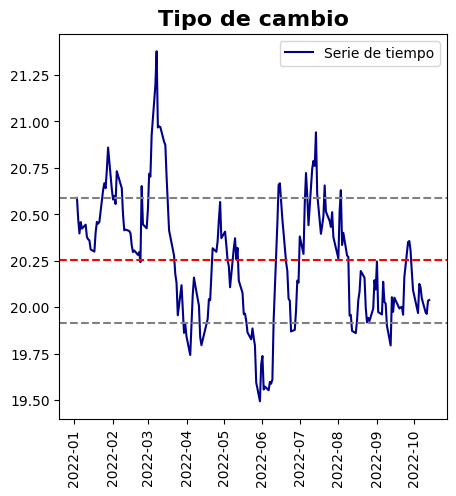

In [6]:
#Gráfica de los datos
fig = plt.figure(figsize=(5.,5.))
ax = fig.add_subplot(1,1,1)
ax.set_title("Tipo de cambio",fontsize=16,fontweight='bold')
ax.plot(M["Fecha"],M["Tipo de Cambio"],color="darkblue",label="Serie de tiempo")
plt.axhline(y = media, color = 'red', ls= '--')
plt.axhline(y = media - varianza**(0.5), color = 'gray', ls= '--')
plt.axhline(y = media + varianza**(0.5), color = 'gray', ls= '--')
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.show()

# Pronóstico con base en la media

In [7]:
#Cálculo de rendimientos
M.sort_values(by=["Fecha"],ascending=False,inplace=True)
M.reset_index(drop=True,inplace=True)
M["Rendimientos"] = (M["Tipo de Cambio"] - M["Tipo de Cambio"].shift(-1))/M["Tipo de Cambio"].shift(-1)
M.head()

,Fecha,Tipo de Cambio,Rendimientos
0,2022-10-13,20.03980,0.00023
1,2022-10-12,20.03520,0.00351
2,2022-10-11,19.96520,-0.00050
3,2022-10-10,19.97520,-0.00374
4,2022-10-07,20.05020,-0.00291


In [8]:
#Selección de base con una ventana de tiempo determinada
MV = M.iloc[3:90,:].copy(deep=True).reset_index(drop=True)
MV

,Fecha,Tipo de Cambio,Rendimientos
0,2022-10-10,19.97520,-0.00374
1,2022-10-07,20.05020,-0.00291
2,2022-10-06,20.10870,-0.00089
3,2022-10-05,20.12670,0.00786
4,2022-10-04,19.96980,-0.00155
5,2022-10-03,20.00080,-0.00456
6,2022-09-30,20.09250,-0.00496
7,2022-09-29,20.19270,-0.00557
8,2022-09-28,20.30580,-0.00252
9,2022-09-27,20.35700,0.00026


In [9]:
#1. Cálculo de estadísticas
#a) Niveles
media_N, std_N = MV["Tipo de Cambio"].mean(), MV["Tipo de Cambio"].std()
#b) Rendimientos
media_R, std_R = MV["Rendimientos"].mean(), MV["Rendimientos"].std()
#2. Simulación de valores
simul_N = np.random.normal(loc=media_N, scale=std_N, size=3)
simul_R_aux = np.random.normal(loc=media_R, scale=std_R, size=3)
#3. Cambio de rendimientos a valores
y0 = MV.iloc[0,1]
simul_R = []
for r in simul_R_aux:
    simul_R.append(r*y0 + y0)
#4. Vector con valores verdaderos
yV = [M.iloc[2,1],M.iloc[1,1],M.iloc[0,1]]

In [10]:
print("Los datos verdaderos son",yV)

Los datos verdaderos son [19.9652, 20.0352, 20.0398]


In [11]:
print("Los datos simulados con base en los niveles son",simul_N) 

Los datos simulados con base en los niveles son [20.13710225 20.06705329 20.02709798]


In [12]:
print("Los datos simulados con base en los rendimientos son",simul_R) 

Los datos simulados con base en los rendimientos son [20.20856605460192, 20.04215453997846, 19.770439725810846]


In [13]:
#5. Cálculo de errores
Error1, Error2 = 0, 0
for i in range(len(yV)):
    Error1 = (yV[i] - simul_N[i])**2
    Error2 = (yV[i] - simul_R[i])**2
print("El error con base en los datos simulados con niveles es igual a",Error1/len(yV))
print("El error con base en los datos simulados con rendimientos es igual a",Error2/len(yV))

El error con base en los datos simulados con niveles es igual a 5.378040323395083e-05
El error con base en los datos simulados con rendimientos es igual a 0.024184985770418718


https://lya.fciencias.unam.mx/lars/libros/procesos2012.pdf
Página 239, Introducción al Capítulo 8 (Movimiento Browniano)